# Plant Pathology - EDA

In [ ]:
import platform
import random
import torch
import torchvision
import fastai
from fastai.vision.all import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print('python version:      {}'.format(platform.python_version()))
print('torch version:       {}'.format(torch.__version__))
print('torchvision version: {}'.format(torchvision.__version__))
print('fastai version:      {}'.format(fastai.__version__))
print('pandas version:      {}'.format(pd.__version__))
print('numpy version:       {}'.format(np.__version__))
print('matplotlib version:  {}'.format(matplotlib.__version__))

use_cuda = torch.cuda.is_available()
print('CUDA available:      {}'.format(use_cuda))
print('cuDNN enabled:       {}'.format(torch.backends.cudnn.enabled))
print('num gpus:            {}'.format(torch.cuda.device_count()))

if use_cuda:
    print('gpu:                 {}'.format(torch.cuda.get_device_name(0)))

    print()
    print('------------------------- CUDA -------------------------')
    ! nvcc --version

python version:      3.7.10
torch version:       1.7.0
torchvision version: 0.8.1
fastai version:      2.3.0
pandas version:      1.2.3
numpy version:       1.19.5
matplotlib version:  3.4.1
CUDA available:      False
cuDNN enabled:       True
num gpus:            0


In [ ]:
seed = 0

data_dir = Path('../input/plant-pathology-2020-fgvc7')
img_dir  = data_dir / 'images'

## Load Data From Kaggle

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-pathology-2020-fgvc7/sample_submission.csv
/kaggle/input/plant-pathology-2020-fgvc7/train.csv
/kaggle/input/plant-pathology-2020-fgvc7/test.csv
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1743.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_262.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1524.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1336.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1461.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1797.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1499.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1170.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1259.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_422.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_636.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1395.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1800.jpg
/kaggle/input/plant-patholog

In [ ]:
# Set Labels
train_df = pd.read_csv(data_dir/'train.csv')
labels = train_df.columns[1:]
train_df['label'] = train_df[labels].idxmax(1)

# Print Dataset Size and a few Samples
print('Samples: {}'.format(train_df.shape[0]))
print()
train_df.head()

Samples: 1821



,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,scab
1,Train_1,0,1,0,0,multiple_diseases
2,Train_2,1,0,0,0,healthy
3,Train_3,0,0,1,0,rust
4,Train_4,1,0,0,0,healthy


## EDA

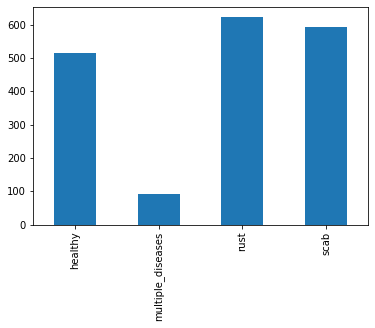

In [ ]:
# Plot Sample Counts per Class
train_df[labels].sum().plot(kind='bar');

In [ ]:
# Print Sample Counts per Class
df = pd.DataFrame({
    'train': train_df['label'].value_counts()
})

df["train_pct"] = df["train"]/df["train"].sum(); df

,train,train_pct
rust,622,0.341571
scab,592,0.325096
healthy,516,0.283361
multiple_diseases,91,0.049973


## Visualize Sample Images

In [ ]:
# Load Data into Fastai DataLoader
set_seed(seed, reproducible=True)

db = DataBlock(
    blocks=(ImageBlock, CategoryBlock()), 
    getters=[ColReader('image_id', pref=img_dir, suff='.jpg'), ColReader('label')], 
    splitter=RandomSplitter(valid_pct=0.2, seed=seed),
)

dls = db.dataloaders(source=train_df, bs=25, seed=seed)

print('Classes: {}'.format(dls.vocab)); print()
print('Train Samples: {}'.format(len(dls.train_ds)))
print('Valid Samples: {}'.format(len(dls.valid_ds)))
print('Total Samples: {}'.format(len(dls.train_ds) + len(dls.valid_ds)))

Classes: ['healthy', 'multiple_diseases', 'rust', 'scab']

Train Samples: 1457
Valid Samples: 364
Total Samples: 1821


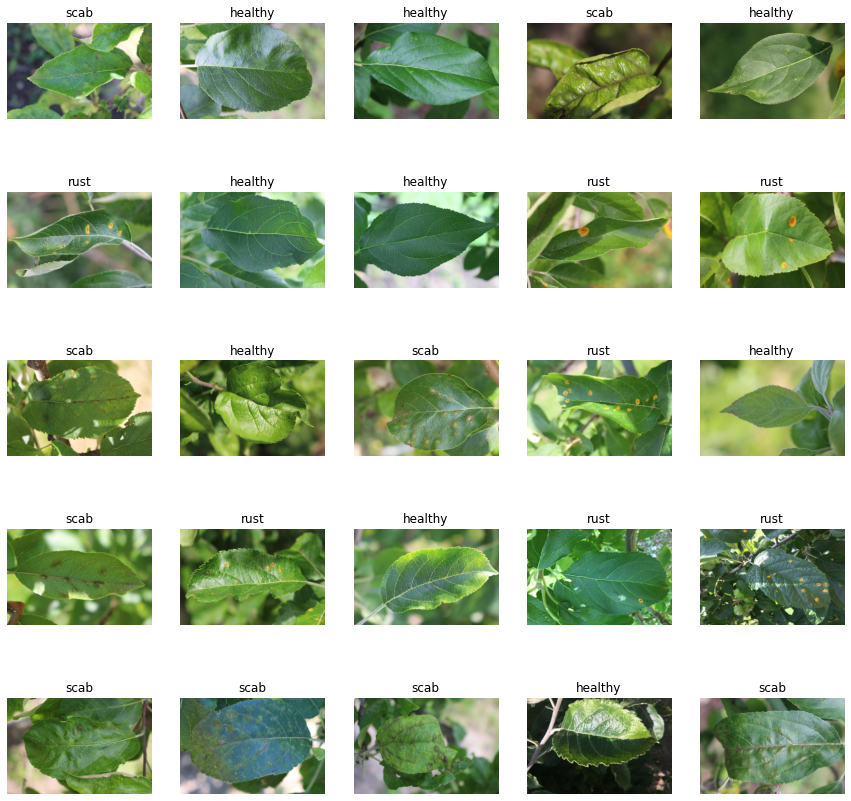

In [ ]:
# Show a few Samples
dls.show_batch(max_n=25)